# 💳 Customer Transaction Analysis with Fraud Detection

**Tools Used:** Python (Pandas, Matplotlib, Seaborn)

**Objective:** Analyze customer transaction data to identify revenue trends, top contributors, and detect fraud patterns.


## Step 1: Import Required Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Step 2: Load Dataset

In [4]:
df = pd.read_csv("Customer_Transaction_Merged_Cleaned.csv")
df.head()

,TransactionID,CustomerID,MerchantID,TransactionDate,Amount,PaymentType,IsFraud,Name,Gender,AgeGroup,Region,SignupDate,MerchantName,Category,City,Country
0,TXN000001,CUST0449,MERCH0096,2024-10-03 17:43:09.307,29812.95,Debit Card,0,Customer_449,Male,18-25,East,2024-06-23 17:43:09.293,Merchant_96,Grocery,Chennai,India
1,TXN000002,CUST0087,MERCH0032,2025-03-04 17:43:09.307,38879.93,Net Banking,0,Customer_87,Female,46-60,South,2025-02-11 17:43:09.290,Merchant_32,Home Decor,Delhi,India
2,TXN000003,CUST0101,MERCH0053,2025-04-01 17:43:09.307,25345.72,Net Banking,0,Customer_101,Male,26-35,East,2021-07-12 17:43:09.290,Merchant_53,Beauty,Mumbai,India
3,TXN000004,CUST0008,MERCH0059,2024-08-14 17:43:09.310,25519.15,Net Banking,0,Customer_8,Male,26-35,West,2022-08-14 17:43:09.290,Merchant_59,Clothing,Delhi,India
4,TXN000005,CUST0200,MERCH0069,2024-10-29 17:43:09.310,36293.00,Credit Card,0,Customer_200,Male,46-60,North,2023-12-17 17:43:09.290,Merchant_69,Grocery,Ahmedabad,India


## Step 3: Convert transaction_date to datetime format

In [5]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])

# Extract year and month for trend analysis
df['year'] = df['TransactionDate'].dt.year
df['month'] = df['TransactionDate'].dt.month
df.head(5)

,TransactionID,CustomerID,MerchantID,TransactionDate,Amount,PaymentType,IsFraud,Name,Gender,AgeGroup,Region,SignupDate,MerchantName,Category,City,Country,year,month
0,TXN000001,CUST0449,MERCH0096,2024-10-03 17:43:09.307,29812.95,Debit Card,0,Customer_449,Male,18-25,East,2024-06-23 17:43:09.293,Merchant_96,Grocery,Chennai,India,2024,10
1,TXN000002,CUST0087,MERCH0032,2025-03-04 17:43:09.307,38879.93,Net Banking,0,Customer_87,Female,46-60,South,2025-02-11 17:43:09.290,Merchant_32,Home Decor,Delhi,India,2025,3
2,TXN000003,CUST0101,MERCH0053,2025-04-01 17:43:09.307,25345.72,Net Banking,0,Customer_101,Male,26-35,East,2021-07-12 17:43:09.290,Merchant_53,Beauty,Mumbai,India,2025,4
3,TXN000004,CUST0008,MERCH0059,2024-08-14 17:43:09.310,25519.15,Net Banking,0,Customer_8,Male,26-35,West,2022-08-14 17:43:09.290,Merchant_59,Clothing,Delhi,India,2024,8
4,TXN000005,CUST0200,MERCH0069,2024-10-29 17:43:09.310,36293.00,Credit Card,0,Customer_200,Male,46-60,North,2023-12-17 17:43:09.290,Merchant_69,Grocery,Ahmedabad,India,2024,10


## Step 4: Basic Performance Metrics

In [6]:
total_transactions = df.shape[0]
total_revenue = df['Amount'].sum()
avg_transaction_value = df['Amount'].mean()
fraud_count = df[df['IsFraud'] == 1].shape[0]

print(f"Total Transactions: {total_transactions}")
print(f"Total Revenue: ₹{total_revenue:,.2f}")
print(f"Average Transaction Value: ₹{avg_transaction_value:,.2f}")
print(f"Total Fraudulent Transactions: {fraud_count}")


Total Transactions: 7500
Total Revenue: ₹191,549,764.79
Average Transaction Value: ₹25,539.97
Total Fraudulent Transactions: 364


## Step 5 : Exploratory Data Analysis (EDA)

### Step 5.1 : Fraud Analysis by Region

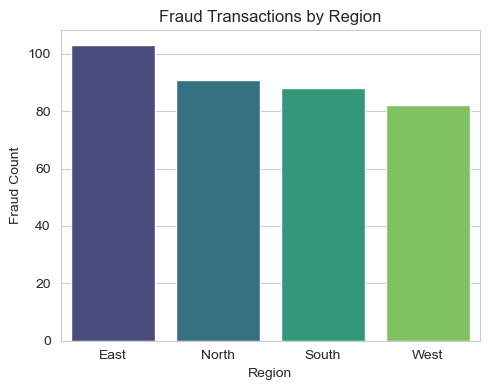

In [25]:
fraud_region = df[df['IsFraud'] == 1]['Region'].value_counts()
plt.figure(figsize=(5,4))
sns.barplot(x=fraud_region.index, y=fraud_region.values, palette='viridis')
plt.title('Fraud Transactions by Region')
plt.xlabel('Region')
plt.ylabel('Fraud Count')
plt.tight_layout()
plt.show()

## 📌 Insights:
- **East** region has the highest number of fraud cases, followed by **North** and **South**.
- Regular monitoring should be implemented in these regions.

### Step 5.2 : Top 5 Cities by Revenue

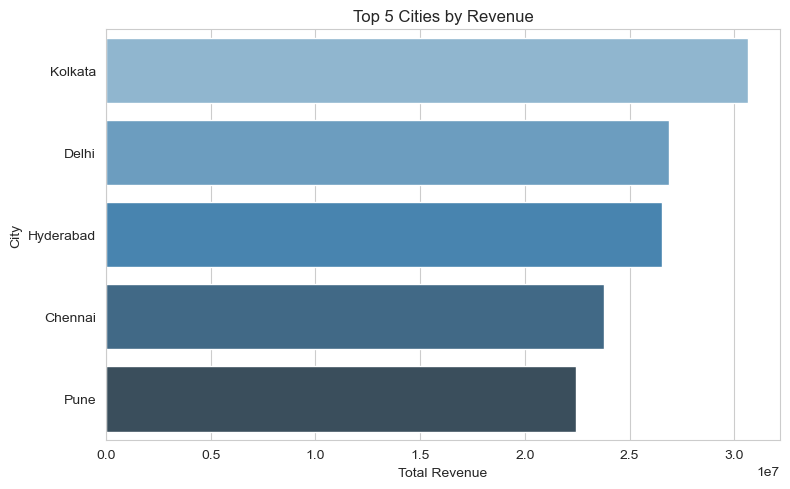

In [16]:
top_cities_revenue = df.groupby('City')['Amount'].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(8,5))
sns.barplot(x=top_cities_revenue.values, y=top_cities_revenue.index, palette='Blues_d')
plt.title("Top 5 Cities by Revenue")
plt.xlabel("Total Revenue")
plt.ylabel("City")
plt.tight_layout()
plt.show()


## 📌 Insights:
**Kolkata**,**Delhi** and **Hyderabad** are the top contributors to revenue, making them prime cities for targeted marketing and customer engagement.

### Step 5.3 : Fraud Percentage by Region

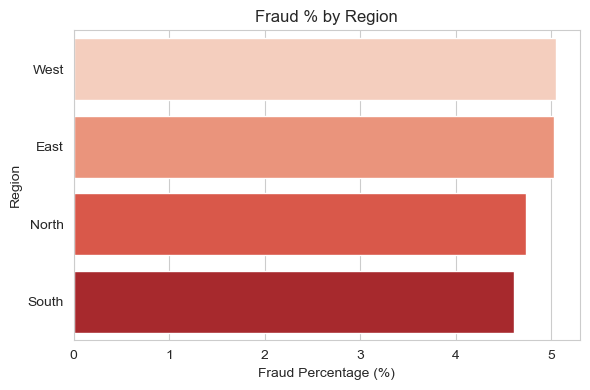

In [23]:
# Fraud % by Region
fraud_df = df[df['IsFraud'] == 1]
total_by_region = df.groupby('Region').size()
fraud_by_region = fraud_df.groupby('Region').size()

fraud_percent = (fraud_by_region / total_by_region * 100).sort_values(ascending=False)

plt.figure(figsize=(6,4))
sns.barplot(x=fraud_percent.values, y=fraud_percent.index, palette='Reds')
plt.title("Fraud % by Region")
plt.xlabel("Fraud Percentage (%)")
plt.ylabel("Region")
plt.tight_layout()
plt.show()


## 📌 Insights:
Although **East** had the highest number of fraud cases(103), the **West region** has the highest **fraud percentage**(~5.05%). this indicates that 
**a higer share of transactions in the West are fraudulent**, making it critical risk zone.

## 🔥 Fraud Risk Heatmap - Fraud by Category and Region
Visualising fraud intensity across different **categories and regions** helps identify fraud-prone combinations at a glance.

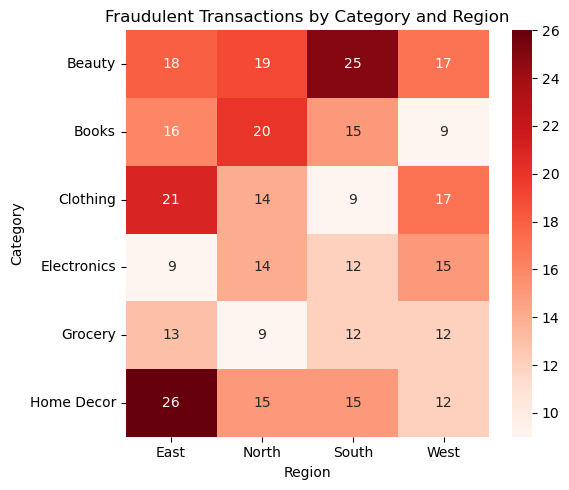

In [9]:
heatmap_data = df[df['IsFraud'] == 1].pivot_table(index='Category', columns='Region', 
                                                   values='TransactionID', aggfunc='count', fill_value=0)

plt.figure(figsize=(6,5))
sns.heatmap(heatmap_data, annot=True, cmap='Reds')
plt.title('Fraudulent Transactions by Category and Region')
plt.xlabel('Region')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

## 📌 Insights:
 From the heatmap, the **Home Decor** category in the **East** region has the highest concentration of fraud (26 cases), followed closely by **Beauty** in the **South** (25).

Lighter shades in other cells indicate lower fraud activity, helping businesses pinpoint and prioritize fraud prevention efforts.

